In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster 
import sklearn.decomposition
import matplotlib.colors
import seaborn as sns

In [4]:
df = pd.read_csv('scaled_data.csv',index_col=[0])

(50, 242)


Text(0.5, 1.0, 'KMeans Cluster Plot')

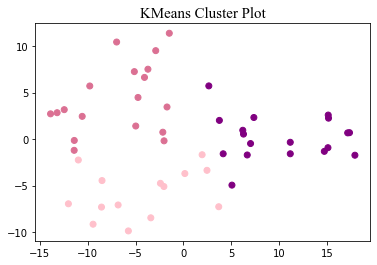

In [17]:
model = sklearn.cluster.KMeans(n_clusters=3)
cluster_assignments = model.fit_predict(df)

cmap = matplotlib.colors.ListedColormap(['pink', 'purple', 'palevioletred'])

pca = sklearn.decomposition.PCA(n_components=2)
pc1, pc2 = zip(*pca.fit_transform(df))

plt.scatter(pc1, pc2, c=cluster_assignments.tolist(), cmap=cmap)
plt.title('KMeans Cluster Plot',fontsize=15,fontname='Times New Roman')

Text(0, 0.5, 'Proportion of Variance Explained')

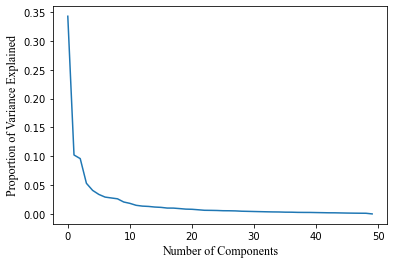

In [20]:
pca = sklearn.decomposition.PCA()
pca.fit(df)

variance = pca.explained_variance_ratio_

fig, ax = plt.subplots()

plt.plot(range(len(variance)), variance)

plt.xlabel("Number of Components",fontsize=12,fontname='Times New Roman')
plt.ylabel("Proportion of Variance Explained",fontsize=12,fontname='Times New Roman')

Text(0.5, 1.0, 'KMeans Cluster Plot')

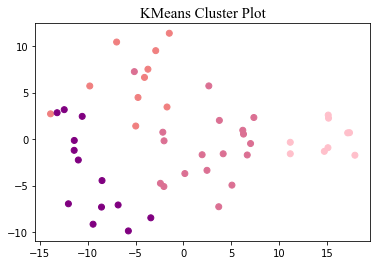

In [21]:
model = sklearn.cluster.KMeans(n_clusters=4)

cluster_assignments = model.fit_predict(df)

cmap = matplotlib.colors.ListedColormap(['pink', 'purple', 'palevioletred','lightcoral'])

pca = sklearn.decomposition.PCA(n_components=2)
pc1, pc2 = zip(*pca.fit_transform(df))

plt.scatter(pc1, pc2, c=cluster_assignments.tolist(), cmap=cmap)
plt.title('KMeans Cluster Plot',fontsize=15,fontname='Times New Roman')

C:\Users\laure\OneDrive\Documents\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

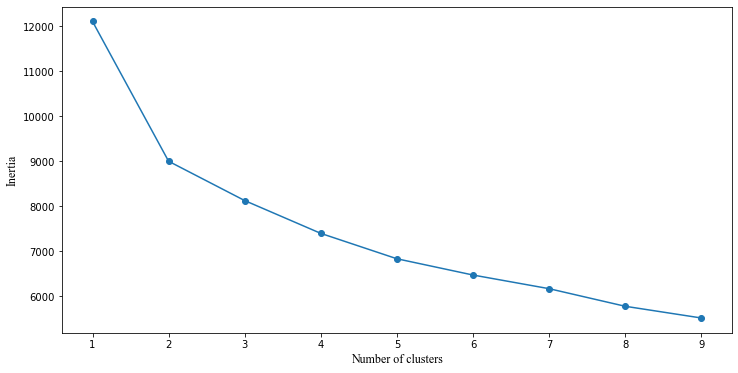

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters',fontsize=12,fontname='Times New Roman')
plt.ylabel('Inertia',fontsize=12,fontname='Times New Roman')

#Recall the first property of clusters we covered above. This is what inertia evaluates. 
#It tells us how far the points within a cluster are. So, inertia actually calculates the sum of distances of all the points within a cluster from the centroid of that cluster.
#We calculate this for all the clusters and the final inertial value is the sum of all these distances. This distance within the clusters is known as intracluster distance. 
#So, inertia gives us the sum of intracluster distances

# We want the points within the same cluster to be similar to each other, right? Hence, the distance between them should be as low as possible.
#Keeping this in mind, we can say that the lesser the inertia value, the better our clusters are.

17.120234522529127
[0 1 2 3]
[0 3 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Estimated clusters: 4


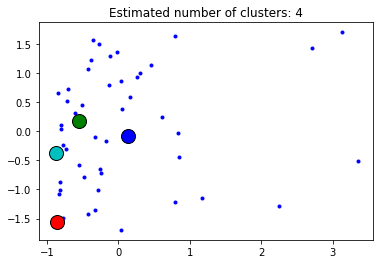

In [6]:
from sklearn.cluster import MeanShift
from itertools import cycle

bandwidth = sklearn.cluster.estimate_bandwidth(df,quantile=0.16)
print(bandwidth)

ms = MeanShift(bandwidth=bandwidth)
ms.fit(df)
labels = ms.labels_
print(np.unique(labels))
print(labels)

cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))
print("Estimated clusters:", n_clusters_)

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(df.iloc[my_members, 0], df.iloc[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()
